Logistic regression using features:
middleColsSum, verticalSymmetry, horizontalSymmetry, middleAreaSum, varianceOfCols
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

Confusion matrix:
[[178   0]
 [  0 182]]
----------------------------------------
Logistic regression using features:
middleColsSum, verticalSymmetry, horizontalSymmetry, middleAreaSum, varianceOfCols

Crossvalidation:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.99      1.00      1.00       182

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

Confusi

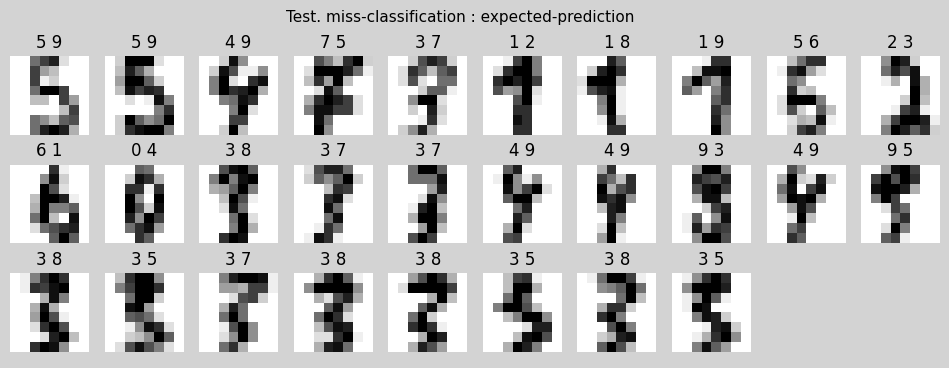

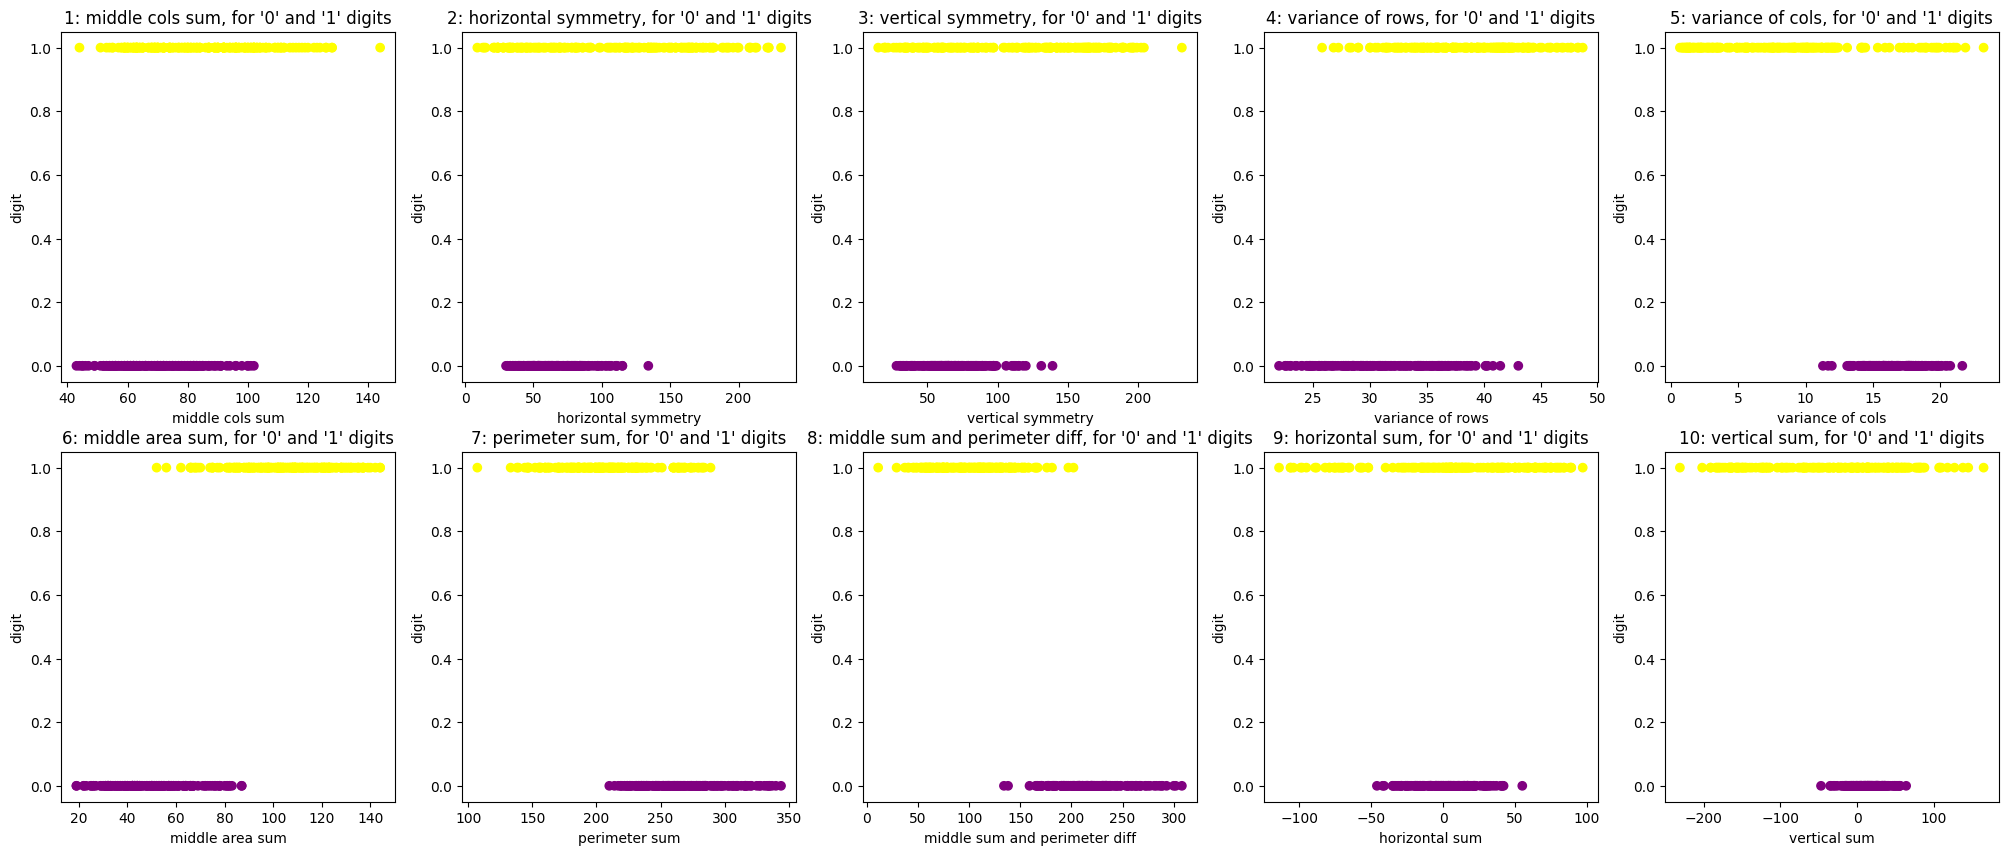

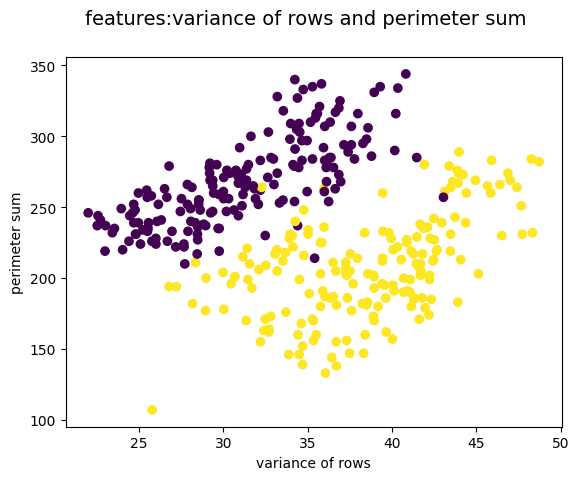

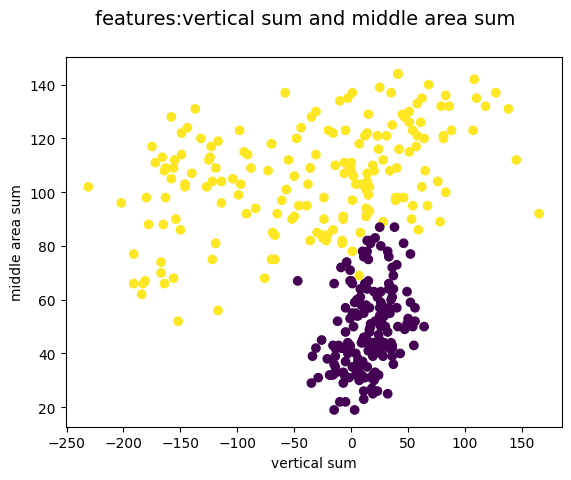

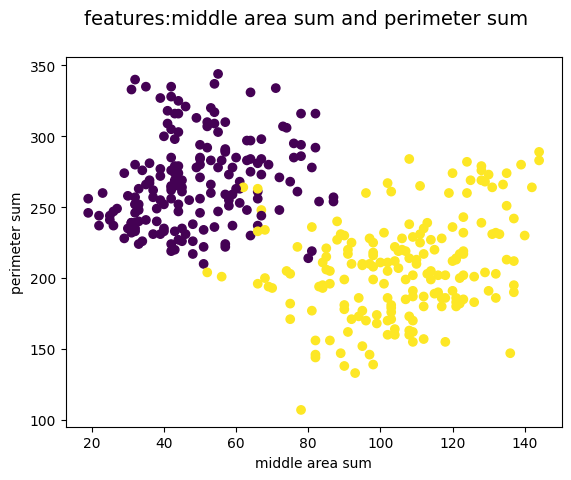

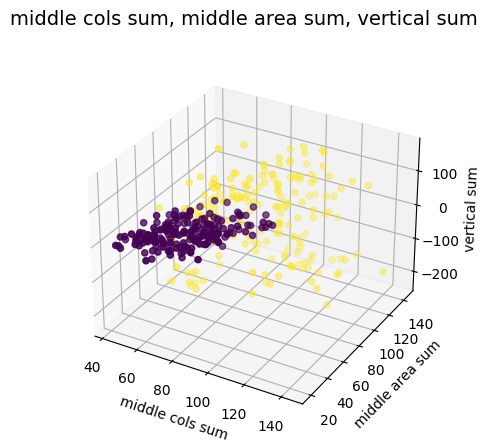

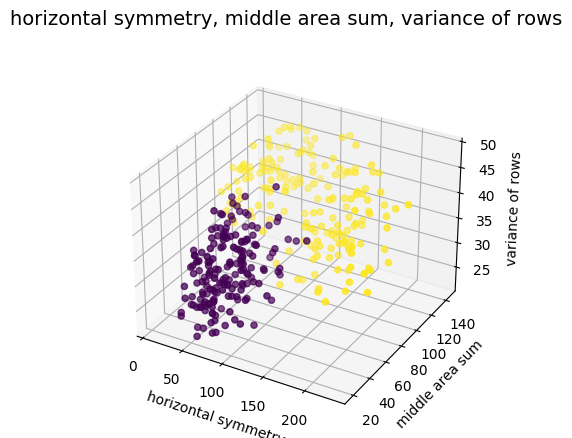

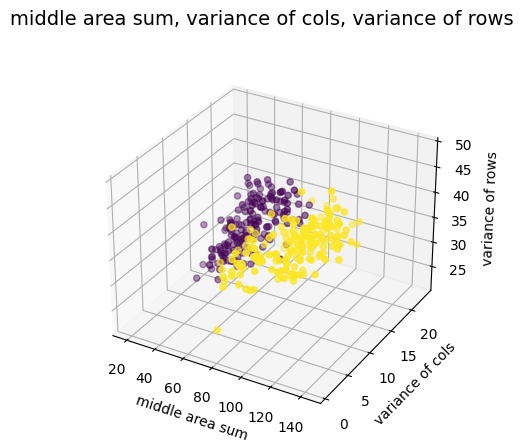

In [19]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 14 20:47:00 2022
@author: Nadav Malul  and Ely asaf 
"""

import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn. model_selection import cross_val_predict
from sklearn import preprocessing




#---------------------------------------------------------------------------
#This code section is the result for question 19
def getMistakes(X_test, y_test,predicted):
    assign = lambda x, y: True if x != y else False #Since we only want to see mistakes
    mask = np.array(list(map(assign, y_test, predicted)))
    X_images = X_test[mask]
    true_label = y_test[mask]
    prediction_mistakes = predicted[mask]
    return X_images,true_label,prediction_mistakes


def displayMistakesOnly(X_images,true_label,prediction_mistakes):
    num_of_mistakes = len(prediction_mistakes)
    rows = int(num_of_mistakes/10 + 0.9)

    fig, axes = plt.subplots(nrows=rows, ncols=10, figsize=(12,4), facecolor='lightgrey')
    for ax in axes.ravel():
        ax.set_axis_off() #Doing this before will save removing all non image contained axes in the end

    for ax,image, expected, prediction in zip(axes.ravel(), X_images, true_label, prediction_mistakes):
        ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r)
        ax.set_title(f"{expected} {prediction}")
        _ = fig.suptitle("Test. miss-classification : expected-prediction", fontsize=11)

def run_Q19(n_samples, data):
    from sklearn import svm
    from sklearn.model_selection import train_test_split
    clf = svm.SVC(gamma=0.001)
    # Split data into 50% train and 50% test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.5, shuffle=False)
    clf.fit(X_train, y_train)
    # Predict the value of the digit on the test subset
    predicted = clf.predict(X_test)
    X_images,true_label, prediction_mistakes = getMistakes(X_test,y_test,predicted)
    displayMistakesOnly(X_images, true_label, prediction_mistakes)
#-------------------------------------------------------------------------

#from now on all functions described are functions for Q20 solution.
"""
General documentation for functions 1-10: (all features)
    
    Parameters
    ----------
    all functions with the following list of input-arguments: (matrix,rows,cols):
    matrix : the 8x8 image as a 1d numphy array-like type
    rows : size of matrix rows
    cols : size of matrix cols
    
    
    all functions with the following single input argument: (matrix)
    matrix will be a 2d array of values as it was in the 1d show

    Returns
    each function returns an interger which is the feature value for the given input
    -------
"""


'''
1. middleColsSum: calculates the sum of the two middle cols in the matrix
'''
def middleColsSum(matrix, rows, cols):
    data = matrix.reshape(rows,cols)
    midSum =0
    for i in range(2):
        for j in range(cols):
            midSum += data[i+3][j]
    return midSum        
'''
2. Check horizontal symmetry calculates the horizontal value of the given matrix.
this function is explained in the word file
'''
def checkHorizontalSymmetry(matrix):
    half = math.floor(len(matrix)/2)
    firstHalf = matrix[:half]
    secondHalf = np.flip(matrix[half:],0)
    horizontalSum = sum(abs(x-y) for x,y in zip(firstHalf,secondHalf))
    return horizontalSum
'''
3. Check vertical symmetry calculates the horizontal value of the given matrix.
this function is explained in the word file
'''
def checkVerticalSymmetry(matrix, rows, cols):
    verticalSum = 0
    for i in range(0, rows):
        for j in range(0, math.floor(cols/2)):
            verticalSum += abs(matrix[i*cols + j]-matrix[cols*(i+1) - j - 1])
    return verticalSum
'''
4. This is a shell function to use a function which recieves a 1d array-like numpy
type. from this function we use getVarByRows which recieves a matrix (2d array)
'''
def rowsVariance(matrix, rows, cols):
    return getVarByRows(matrix.reshape(rows, cols))
'''
5. This is a shell function to use a function which recieves a 1d array-like numpy
type. from this function we use getVarByRows which recieves a matrix (2d array)
also, we want to calculate cols variance by using a function which calculates rows variance
hence we transpose the matrix before sending it to the function.
'''
def colsVariance(matrix, rows, cols):
    return getVarByRows(np.transpose(matrix.reshape(rows, cols)))    

#This is an helping function and not one of the features. This func is used by rowsVariance,colsVariance
def getVarByRows(data):
    means = [row.mean() for row in data]
    squared_errors = [(row-mean)**2 for row, mean in zip(data, means)]
    return sum(x.mean() for x in squared_errors) / len(squared_errors)
'''
6. Returns the sum of the middle area in the matrix. 
this is explained in the word file more carefully
'''
def middleAreaSum(matrix, rows, cols):
    data = matrix.reshape(rows, cols)
    midSum = 0
    for i in range(int(1/3 * rows), int(2/3 * rows)):
        for j in range(int(1/3 * cols), int(2/3 * cols)):
            midSum += data[i][j]
    return midSum
'''
7. Returns the perimeter area sum, which is defined to be matrix sum - middle area sum
'''
def perimeterAreaSum(matrix, rows, cols):
    matrixSum = sum(x for x in matrix if x>0)
    return abs(matrixSum - middleAreaSum(matrix, rows, cols))
'''
8. Returns the difference between the perimeter and the middle area of the matrix
'''
def middlePerimeterDiff(matrix, rows, cols):
    return abs(middleAreaSum(matrix, rows, cols) - perimeterAreaSum(matrix, rows, cols))
'''
9. cuts the matrix in to two equal parts (by rows), sums each part and returns the difference
between those two sums
'''
def checkHorizontalSum(matrix):
    half = math.floor(len(matrix)/2)
    firstHalf = matrix[:half]
    secondHalf = np.flip(matrix[half:],0)
    return sum(x for x in firstHalf) - sum(y for y in secondHalf)
'''
10. cuts the matrix in to two equal parts (by cols), sums each part and returns the difference
between those two sums. to avoid code-reuse we transpose the matrix and use the function above
'''
def checkVerticalSum(matrix,rows,cols):
    verticalSumVector  = (checkHorizontalSum(np.transpose(matrix.reshape(rows, cols))))
    return sum(x for x in verticalSumVector)
    
#End of feature functions
#---------------------------------------------------------------------------------------------------
#----------------------------This code also relates to question 20#----------------------------

#Creating hashmap of the feature values. we transpose this map to get each feature value as a row
'''
mapFeatures recieves 'images' which is a 1d array-like numpy type with images
and returns a table in which table['feature_id'] is an array of all feature results for all images
(the indices are remained as they have been in the given array-like)
This map is all feature values of all images. it is used to extract some features or all of them.
the reason we transpose, is to get each feature values by rows instead of by cols. this will help
us later on using the "getFeaturesData" function below.
'''
def mapFeatures(images):
    properties = np.transpose([[middleColsSum(x,8,8), checkHorizontalSymmetry(x), checkVerticalSymmetry(x, 8, 8),
                  rowsVariance(x, 8, 8), colsVariance(x, 8, 8), middleAreaSum(x, 8, 8),
                  perimeterAreaSum(x, 8, 8), middlePerimeterDiff(x, 8, 8), checkHorizontalSum(x),checkVerticalSum(x,8,8) ] for x in images])
    return { 'middle cols sum' : properties[0], 'horizontal symmetry' : properties[1], 'vertical symmetry' : properties[2],
                      'variance of rows' : properties[3], 'variance of cols' : properties[4], 'middle area sum' : properties[5],
                      'perimeter sum' : properties[6], 'middle sum and perimeter diff' : properties[7],'horizontal sum':properties[8],
                      'vertical sum' : properties[9]}
    

'''
getFeaturesData recieves a mask, the mask could be the indices of 0,1 digits or any digit.
the function will return a features string with all used features and a result vector (X1)
also, getFeaturesData recieves a boolean called "digits_0_1"
if its true it will use the right amount of features to classify the 0,1 digits.
else, it will use all features to classify any given mask
'''
def getFeaturesData(featuresMap,mask, digits_0_1):
    middleColsSum = featuresMap['middle cols sum'][mask]
    horizontalSymmetry = featuresMap['horizontal symmetry'][mask]
    VerticalSymmetry = featuresMap['vertical symmetry'][mask]
    varianceOfRows = featuresMap['variance of rows'][mask]
    varianceOfCols = featuresMap['variance of cols'][mask]
    middleAreaSum = featuresMap['middle area sum'][mask]
    perimeterSum = featuresMap['perimeter sum'][mask]
    horizontalSum = featuresMap['horizontal sum'][mask]
    verticalSum = featuresMap['vertical sum'][mask]
    # creating the X (feature) matrix
    if digits_0_1:
        X1 = np.column_stack((middleColsSum, VerticalSymmetry, horizontalSymmetry, middleAreaSum, varianceOfCols,verticalSum))
        featuresString1 = "middleColsSum, verticalSymmetry, horizontalSymmetry, middleAreaSum, varianceOfCols"
        return featuresString1 , X1
    X1 = np.column_stack((middleColsSum,horizontalSymmetry,VerticalSymmetry,varianceOfRows,varianceOfCols,middleAreaSum,perimeterSum,horizontalSum,verticalSum))
    featuresString1 = "middleColsSum,horizontalSymmetry,VerticalSymmetry,varianceOfRows,varianceOfCols,middleAreaSum,perimeterSum,horizontalSum,verticalSum"
    return featuresString1, X1
      


'''
This function recieves:
 featuresVector- a vector with results to all features (on all of the images in the mask)
 featuresString- a string with the names of all the features used to create the vector
 mask - the mask will help with getting the label of the given images (regardless of the mask itself)

This function prints 
'''
def classify(featuresVector, featuresString,mask):
    # creating the X (feature) matrix
    # scaling the values for better classification performance
    X_scaled = preprocessing.scale(featuresVector)
    # the predicted outputs
    Y = digits.target[mask]
    # Training Logistic regression
    logistic_classifier = linear_model.LogisticRegression(solver='lbfgs')
    logistic_classifier.fit(X_scaled, Y)
    # show how good is the classifier on the training data
    expected = Y
    predicted = logistic_classifier.predict(X_scaled)
    print("Logistic regression using features:"+'\n' + featuresString)
    print((metrics.classification_report(expected,predicted)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
    
    print('-' * 40) #To divide between predicted and predicted2 outputs
    
    predicted2 = cross_val_predict(logistic_classifier, X_scaled, Y, cv=10)
    print("Logistic regression using features:"+'\n' + featuresString +'\n\n' + "Crossvalidation:\n")
    print(metrics.classification_report( expected,predicted2))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted2)) 


'''
display_1d_plots recieves 'propertiesMap' which is an hashtable of features.
and also a mask (which will always be the indices of the 0,1 images)
this function is used to plot the features as requested, this way we can see
the quality of each feature alone
expected result: 2 rows, each row with 5 cols, each ax will specify a feature values.
the feature name will be displayed and the color will indicate the given label
'''
def display_1d_plots(featuresMap,mask):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,10)) 
    #axes.xlabel('hl')
    colorMap =  ListedColormap(["purple","yellow"])
    counter=1
    for values, title, ax in zip(featuresMap.values(),featuresMap.keys(), axes.ravel()):
        ax.set_xlabel(title)
        ax.set_ylabel('digit')
        ax.set_title(str(counter)+": " + title+", for '0' and '1' digits")
        ax.scatter(values[mask], digits.target[mask], cmap=colorMap, c=digits.target[mask])
        counter+=1
'''
display_2d_plots recieves data which is the digit images, a mask for indices 0,1
and target which will be the label (color for tag)
The function displays three two-dimentional graphs which will visually show how good
is the seperation of the labels using 2 features only 
'''
def display_2d_plots(data,mask,target):
    featuresMap = mapFeatures(data)
    x_array = ['variance of rows', 'vertical sum','middle area sum']
    y_array = ['perimeter sum','middle area sum','perimeter sum']
    
    for i in range(0,3):
        display_2d(featuresMap[x_array[i]][mask],featuresMap[y_array[i]][mask],target[mask],x_array[i],y_array[i])        
'''
display_3d_plots recieves data which is the digit images, a mask for indices 0,1
and target which will be the label (color for tag)
The function displays three three-dimentional graphs which will visually show how good
is the seperation of the labels using 3 features only 
'''
def display_3d_plots(data,mask,target):   
    featuresMap = mapFeatures(data)
    x_array = ['middle cols sum','horizontal symmetry','middle area sum']
    y_array = ['middle area sum','middle area sum', 'variance of cols']
    z_array = ['vertical sum','variance of rows','variance of rows']
    for i in range(0,3):
        display_3d(featuresMap[x_array[i]][mask],featuresMap[y_array[i]][mask],featuresMap[z_array[i]][mask],
                       target[mask],x_array[i],y_array[i],z_array[i])

'''
This function recieves:
featureA,featureB,colorLabel : 3 arrays in the same size
titleXaxis, titleYaxis: titles for x,y axis

here we want to plot points on 2d graph. each point is (a,b,color)
so that a=featureA[index], b=featureB[index], color=colorLabel[index]
Note! the variable names are generic on purpose since this function is used on
different combination of features
'''
def display_2d(featureA, featureB, colorLabel,titleXaxis,titleYaxis):
    fig = plt.figure()
    fig.suptitle('features:'+ titleXaxis +' and ' +titleYaxis, fontsize=14)
    ax = plt.subplot()
    ax.scatter(featureA, featureB,c=colorLabel)
    ax.set_xlabel(titleXaxis)
    ax.set_ylabel(titleYaxis)
'''
This function does the same actions as the function described above but with additional dimention.
'''
def display_3d(featureA, featureB,featureC, colorLabel, titleXaxis,titleYaxis,titleZaxis):
    fig = plt.figure()
    fig.suptitle(titleXaxis+', '+titleYaxis+', '+titleZaxis, fontsize=14)
    ax = plt.subplot(projection='3d')
    ax.scatter(featureA, featureB, featureC,c=colorLabel)
    ax.set_xlabel(titleXaxis)
    ax.set_ylabel(titleYaxis)
    ax.set_zlabel(titleZaxis)

'''
The function below recieves:
n_samples: number of image samples
data: digit images at the type of numphy array-like (1d)
mask: a mask for some digit indices (could be every valid mask)
data_0_1: a boolean to know if this is the case of 0,1 digits. 
we want this boolean because we can use a smaller features vector at this case.
target: the digit classification as given (actual result)

the function creates a data structure with all features and sends the relevant ones
to the learning proccess. afterwards, the function will display output to show the
quality of the learning proccess (using logistic regression linear model)
'''
def run_Q20(n_samples,data, mask, data_0_1, target):
    featuresMap = mapFeatures(data)
    if data_0_1: #Display plots used for Q20 section 5
        display_1d_plots(featuresMap, mask) 
        display_2d_plots(data, mask, target)
        display_3d_plots(data, mask, target)
    strings, features= getFeaturesData(featuresMap,mask,data_0_1)
    classify(features, strings, mask)

#End of code for Q20
#-----------------------------------------------------------------------------------------------------------------


# Digits dataset for both questions (q19, q20)
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


#Driver code: NOTE! there are a lot of outputs(including plots), for convenient
#you should consider running 1 at the time

#Q19 run
run_Q19(n_samples, data)
#Q20 run with 0,1 digits
run_Q20(n_samples, data, np.where(np.logical_and(digits.target >= 0, digits.target <= 1)), True, digits.target)
#Q20 run with all digits (its possible to change the mask's condition for some digits)
run_Q20(n_samples,data, np.where(np.logical_and(digits.target >=0, digits.target <=9)), False, digits.target)


